In [1]:
import datetime
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
import xgboost as xgb
import random
import zipfile
import time
import shutil
from sklearn.metrics import log_loss

In [2]:
from lib import *

In [3]:
train, test, features = read_train_test()


Read events...
Read brands...
Read train...
Read test...


In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap


In [7]:
df_events = pd.read_csv("../input/events.csv")
df_events.shape

(3252950, 5)

In [8]:
df_events.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [27]:
df_events['month'] = pd.to_datetime(df_events.timestamp).dt.month

In [28]:
df_events['year'] = pd.to_datetime(df_events.timestamp).dt.year
df_events['day'] = pd.to_datetime(df_events.timestamp).dt.day

,event_id,device_id,timestamp,longitude,latitude,month,year,day
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,5,2016,1
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,5,2016,1
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70,5,2016,1
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28,5,2016,1
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66,5,2016,1
5,6,1476664663289716375,2016-05-01 00:27:21,0.00,0.00,5,2016,1
6,7,5990807147117726237,2016-05-01 00:15:13,113.73,23.00,5,2016,1
7,8,1782450055857303792,2016-05-01 00:15:35,113.94,34.70,5,2016,1
8,9,-2073340001552902943,2016-05-01 00:15:33,0.00,0.00,5,2016,1
9,10,-8195816569128397698,2016-05-01 00:41:31,119.34,26.04,5,2016,1


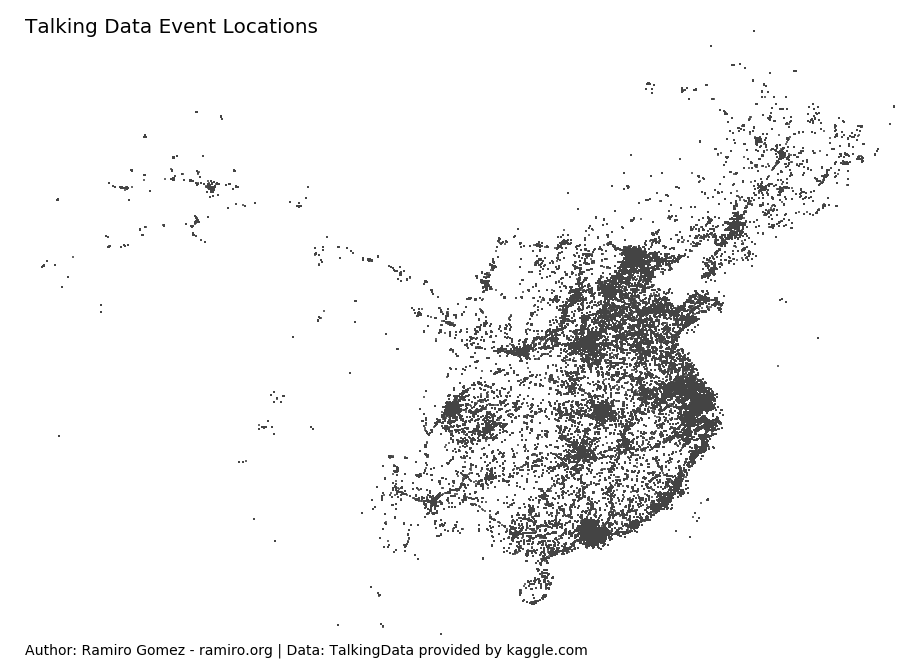

In [10]:

fig = plt.figure(figsize=(16, 12))
markersize = 1
markertype = ',' # pixel
markercolor = '#444444'
markeralpha = .8 #  a bit of transparency

# http://isithackday.com/geoplanet-explorer/index.php?woeid=23424781
# Location (lat/lon): 36.894402, 104.166
# Bounding Box:
# NE 53.5606, 134.773605
# SW 15.77539, 73.557701
m = Basemap(
    projection='mill', lon_0=104.166, lat_0=36.894402,
    llcrnrlon=73.557701, llcrnrlat=15.77539,
    urcrnrlon=134.773605, urcrnrlat=53.5606)

# avoid border around map
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)

# draw event locations
x, y = m(df_events.longitude.values, df_events.latitude.values)
m.scatter(x, y, markersize, marker=markertype, color=markercolor, alpha=markeralpha)

# annotations
plt.annotate('Talking Data Event Locations', xy=(0.02, .96), size=20, xycoords='axes fraction')

plt.annotate(footer, xy=(0.02, -0.02), size=14, xycoords='axes fraction')

plt.show()

In [35]:
df_events['counts'] = df_events.groupby(['device_id'])['event_id'].transform('count')

In [36]:
df_events.head()

,event_id,device_id,timestamp,longitude,latitude,month,year,day,counts
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,5,2016,1,256
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,5,2016,1,73
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70,5,2016,1,248
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28,5,2016,1,47
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66,5,2016,1,525


In [41]:
select_one = df_events.loc[df_events.device_id == 29182687948017175]

In [46]:
import seaborn as sns

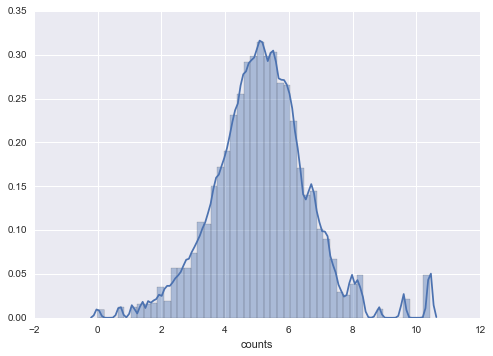

In [53]:
sns.distplot(np.log(df_events.counts))

In [54]:
app_events = pd.read_csv("../input/app_events.csv")



In [117]:
events_total = pd.merge(app_events,df_events, on = "event_id", how="right")

In [126]:
events_total = pd.merge(df_events, app_events, how='left', on='event_id', left_index=False)

In [127]:
events_total.head()

,event_id,device_id,timestamp,longitude,latitude,month,year,day,counts,app_id,is_installed_1,is_active_0,is_active_1
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,5,2016,1,256,NaN,NaN,NaN,NaN
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,5,2016,1,73,5.927333e+18,1.0,0.0,1.0
2,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,5,2016,1,73,-5.720079e+18,1.0,1.0,0.0
3,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,5,2016,1,73,-1.633888e+18,1.0,1.0,0.0
4,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,5,2016,1,73,-6.531843e+17,1.0,0.0,1.0


In [70]:
pbd = pd.read_csv("../input/phone_brand_device_model.csv", dtype={'device_id': np.str})

In [69]:
pbd.drop_duplicates('device_id', keep='first', inplace=True)

In [60]:
pbd = map_column(pbd, 'phone_brand')

In [62]:
from sklearn.preprocessing import OneHotEncoder

In [63]:
enc = OneHotEncoder()

In [65]:
from sklearn.feature_extraction import DictVectorizer as DV


In [75]:
pdb_fetaure = pd.get_dummies(pbd.phone_brand)

In [82]:

def convert_to_bin(data, f):
    print "making bins of %s" % f
    for bin in range(min(data[f]), max(data[f]) + 1):
        data[f + "_" + str(bin)] = data[f].apply(lambda x: 1 if x == bin else 0)
    data.drop([f], axis=1, inplace=True)


In [83]:
convert_to_bin(app_events, 'is_installed')


making bins of is_installed


In [85]:
convert_to_bin(app_events, 'is_active')

making bins of is_active


In [90]:
events_total = pd.merge(app_events,df_events,how="inner", on = "event_id")

In [107]:
events_total.head().columns

Index([u'event_id', u'app_id', u'is_installed_1', u'is_active_0',
       u'is_active_1', u'device_id', u'timestamp', u'longitude', u'latitude',
       u'month', u'year', u'day', u'counts'],
      dtype='object')

In [94]:
test = pd.read_csv("../input/gender_age_test.csv", dtype={'device_id': np.str})

In [96]:
test.device_id.values

array(['1002079943728939269', '-1547860181818787117',
       '7374582448058474277', ..., '-8956851351560395765',
       '6097318236795836256', '622421180514002079'], dtype=object)

In [97]:
train = pd.read_csv("../input/gender_age_train.csv", dtype={'device_id': np.str})

In [135]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [136]:
train['target'] = le.fit_transform(train.group)

In [137]:
train.target

0        10
1        10
2        10
3         9
4         9
5         1
6        10
7        10
8        10
9         4
10        9
11        4
12        2
13       10
14       11
15        2
16       10
17       10
18       11
19       10
20        4
21        7
22        7
23        8
24        9
25       10
26       10
27        4
28       10
29       10
         ..
74615     8
74616     9
74617     2
74618     9
74619     7
74620     6
74621     6
74622     5
74623     3
74624     9
74625     2
74626     3
74627     5
74628     7
74629    10
74630     0
74631     0
74632    10
74633    11
74634    11
74635    10
74636     7
74637     7
74638     5
74639     7
74640     9
74641     9
74642     6
74643    10
74644     7
Name: target, dtype: int64